# GemGIS Raster Data

This notebooks presents the different functions of GemGIS that are available for Raster Data.

**What is Raster Data?**

In its simplest form, a raster consists of a matrix of cells (or pixels) organized into rows and columns (or a grid) where each cell contains a value representing information, such as temperature. Rasters are digital aerial photographs, imagery from satellites, digital pictures, or even scanned maps.

<img src="data/images/img2.png" width=300>

- Rasters as basemaps: A common use of raster data in a GIS is as a background display for other feature layers. For example, orthophotographs displayed underneath other layers provide the map user with confidence that map layers are spatially aligned and represent real objects, as well as additional information. Three main sources of raster basemaps are orthophotos from aerial photography, satellite imagery, and scanned maps. Below is a raster used as a basemap for road data.

<img src="data/images/img3.gif" width=300>

- Rasters as surface maps: Rasters are well suited for representing data that changes continuously across a landscape (surface). They provide an effective method of storing the continuity as a surface. They also provide a regularly spaced representation of surfaces. Elevation values measured from the earth's surface are the most common application of surface maps, but other values, such as rainfall, temperature, concentration, and population density, can also define surfaces that can be spatially analyzed. The raster below displays elevation—using green to show lower elevation and red, pink, and white cells to show higher elevations.

<img src="data/images/img4.gif" width=300>

- Rasters as thematic maps: Rasters representing thematic data can be derived from analyzing other data. A common analysis application is classifying a satellite image by land-cover categories. Basically, this activity groups the values of multispectral data into classes (such as vegetation type) and assigns a categorical value. Thematic maps can also result from geoprocessing operations that combine data from various sources, such as vector, raster, and terrain data. For example, you can process data through a geoprocessing model to create a raster dataset that maps suitability for a specific activity. Below is an example of a classified raster dataset showing land use.

<img src="data/images/img5.gif" width=500>

(https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/what-is-raster-data.htm)


In [1]:
import sys
sys.path.append('../../gemgis')

import gemgis as gg

print(gg)

<module 'gemgis' from '../../gemgis\\gemgis\\__init__.py'>


# Supplementary Data

In [2]:
minx = 32286000
maxx = 32328000
miny = 5620000
maxy = 5648000
extent = [minx, maxx, miny, maxy]
center = [(maxx-minx)/2+minx, (maxy-miny)/2+miny]
center
crs = 'EPSG:4647'

# Creating a Map

In [3]:
m = gg.Map(center=center, crs = crs, zoom=10)

## Adding Raster Data to the Map

In [4]:
dem_map = m.load_raster(path='data/DEM50_Weisweiler_EPSG4647.tif', cmap = 'gist_earth')

m.add_layer(dem_map)

hillshade_map = m.load_raster(path='data/Hillshade15m.tif')

m.add_layer(hillshade_map)

In [5]:
m

Map(center=[50.825505062203405, 6.259576208333958], controls=(ZoomControl(options=['position', 'zoom_in_text',…

# Manipulate Raster Data

##  Initiate Raster Object

In [6]:
dem = gg.data.Raster('data/DEM50_Weisweiler_EPSG4647.tif')
dem

## Inspect Raster Attributes

Properties of the raster data stored in the example GeoTIFF can be accessed through attributes of the opened dataset object. 

In [7]:
dem.name

'data/DEM50_Weisweiler_EPSG4647.tif'

In [8]:
dem.mode

'r'

In [9]:
dem.closed

False

In [10]:
dem.count

1

In [11]:
dem.width

840

In [12]:
dem.height

560

In [13]:
dem.indexes

(1,)

Some dataset attributes expose the properties of all dataset bands via a tuple of values, one per band.

In [14]:
dem.bands

{1: 'float32'}

## Dataset georeferencing
A GIS raster dataset is different from an ordinary image; its elements (or “pixels”) are mapped to regions on the earth’s surface. Every pixels of a dataset is contained within a spatial bounding box.

In [15]:
dem.bounds

BoundingBox(left=32286000.0, bottom=5620000.0, right=32328000.0, top=5648000.0)

In [16]:
dem.bounds.left

32286000.0

In [17]:
dem.bounds.right

32328000.0

In [18]:
dem.bounds.top

5648000.0

In [19]:
dem.bounds.bottom

5620000.0

The value of bounds attribute is derived from a more fundamental attribute: the dataset’s geospatial transform.

In [20]:
dem.transform

Affine(50.0, 0.0, 32286000.0,
       0.0, -50.0, 5648000.0)

A dataset’s transform is an affine transformation matrix that maps pixel locations in (row, col) coordinates to (x, y) spatial positions. The product of this matrix and (0, 0), the row and column coordinates of the upper left corner of the dataset, is the spatial position of the upper left corner.

In [21]:
dem.upperleft

(32286000.0, 5648000.0)

The position of the lower right corner is obtained similarly.

In [22]:
dem.lowerright

(32328000.0, 5620000.0)

But what do these numbers mean? These coordinate values are relative to the origin of the dataset’s coordinate reference system (CRS).

In [23]:
dem.crs

CRS.from_epsg(4647)

Rasterio follows pyproj and uses PROJ.4 syntax in dict form as its native CRS syntax. If you want a WKT representation of the CRS, see the CRS class’s wkt attribute.

In [24]:
dem.crs.wkt

'PROJCS["ETRS89 / UTM zone 32N (zE-N)",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",32500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","4647"]]'

## Load Raster as Array

As the arrays are loaded as standard ndarrays, all the typical numpy methods apply.

In [25]:
dem_array = dem.load_raster_as_array
dem_array

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

Data from a raster band can be accessed by the band’s index number. Following the GDAL convention, bands are indexed from 1. The ```load_band_as_array``` method returns a Numpy N-D array.

In [26]:
dem_band_1 = dem.load_band_as_array(1)
dem_band_1

array([[  0.  ,   0.  ,   0.  , ...,  75.17,  71.96,  71.78],
       [  0.  ,   0.  ,   0.  , ...,  73.57,  74.88,  74.96],
       [  0.  ,   0.  ,   0.  , ...,  75.21,  74.88,  74.74],
       ...,
       [  0.  ,   0.  ,   0.  , ..., 220.13, 219.85, 219.55],
       [  0.  ,   0.  ,   0.  , ..., 222.12, 221.25, 220.76],
       [  0.  ,   0.  ,   0.  , ..., 223.76, 222.47, 221.91]],
      dtype=float32)

In [27]:
print(type(dem_band_1))
print(dem_band_1.shape)

<class 'numpy.ndarray'>
(560, 840)


## Access Array Values
Values from the array can be addressed by their row, column index.

In [28]:
dem_band_1[dem.height // 2, dem.width // 2]

159.81

## Spatial Indexing

Datasets have an ```index()``` method for getting the array indices corresponding to points in georeferenced space. To get the value for the pixel 5000 m east and 500 m south of the dataset’s upper left corner, do the following:

In [29]:
x, y = (dem.bounds.left + 5000, dem.bounds.top - 500)
row, col = dem.index(x, y)
row, col

(10, 100)

In [30]:
dem_band_1[row, col]

95.54

To get the spatial coordinates of a pixel, use the dataset’s xy() method. The coordinates of the center of the image can be computed like this.

In [31]:
x,y = dem.xy(dem.height // 2, dem.width // 2)

x,y

(32307025.0, 5633975.0)

# Load Hillshades

In [32]:
hillshade = dem = gg.data.Raster('data/Hillshade15m.tif')
hillshade

In [33]:
hillshade.bands

{1: 'uint8'}

In [34]:
hillshade_band_1 = hillshade.load_band_as_array(1)
hillshade_band_1

array([[  0,  18,   0, ...,   0,   8,   0],
       [ 17, 151, 188, ..., 148, 123,  13],
       [  0, 172, 206, ..., 148, 157,  11],
       ...,
       [  0, 189, 191, ..., 179, 197,   0],
       [ 22, 174, 185, ..., 183, 154,   5],
       [  0,  16,   1, ...,   0,  31,   0]], dtype=uint8)

In [35]:
print(type(hillshade_band_1))
print(hillshade_band_1.shape)

<class 'numpy.ndarray'>
(5733, 8666)


## Plot Arrays

Arrays can easily be plotted with ```raster.plot_raster```. If a origin and extent is provided the array is plotted in the right orientation and at the right coordinates

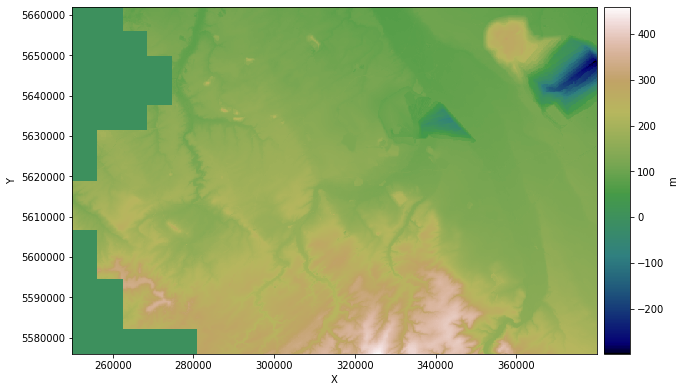

In [36]:
dem.plot_raster(dem_band_1, 
                origin = 'lower', 
                extent = [dem.bounds.left, dem.bounds.right, dem.bounds.bottom, dem.bounds.top], 
                cmap = 'gist_earth', 
                cbar = True, 
                cbar_label = 'm')

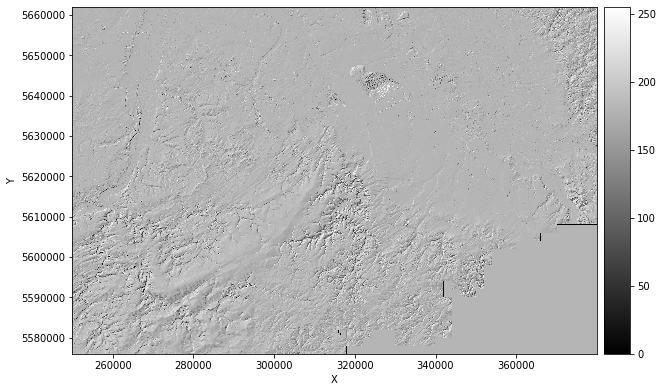

In [37]:
hillshade.plot_raster(hillshade_band_1, 
                      origin = 'lower', 
                      extent = [hillshade.bounds.left, hillshade.bounds.right, hillshade.bounds.bottom, hillshade.bounds.top],
                      cmap='gray', 
                      vmin=0, 
                      vmax=255, 
                      cbar = True)

## Creating Hillshades 

In [38]:
hillshades = dem.calculate_hillshades(dem_band_1)

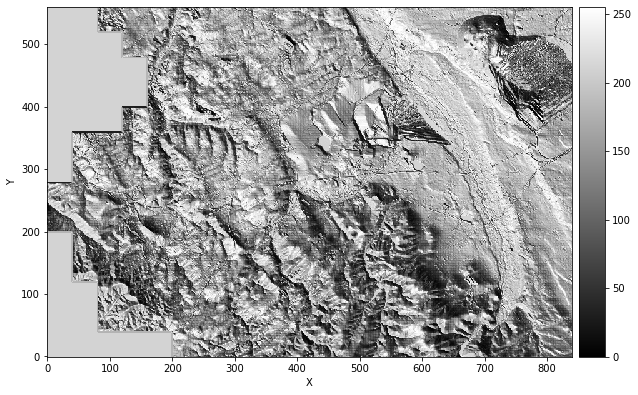

In [39]:
dem.plot_raster(hillshades, origin = 'lower', cmap='gray', vmin=0, vmax=255, cbar = True)

## Creating Slope

In [40]:
slope = dem.calculate_slope(dem_band_1)

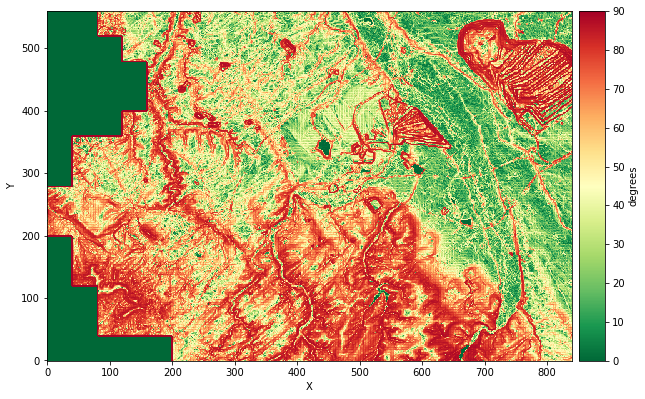

In [41]:
dem.plot_raster(slope, origin = 'lower', cmap = 'RdYlGn_r', cbar = True, cbar_label = 'degrees', vmin = 0, vmax = 90)

## Creating Aspect

In [42]:
aspect = dem.calculate_aspect(dem_band_1)

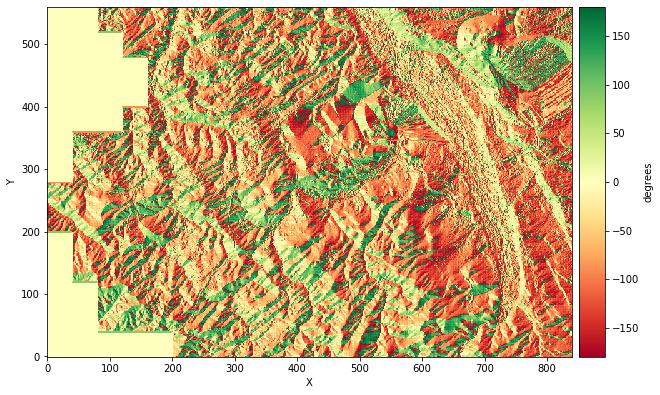

In [43]:
dem.plot_raster(aspect, origin = 'lower', cmap = 'RdYlGn', cbar = True, cbar_label = 'degrees', vmin = -180, vmax = 180)

## Calcuate Curvature

## Save Raster as TIFF

In [44]:
dem.save_array_as_tiff(path = 'dem.tiff', array = dem_band_1)

In [45]:
dem.save_array_as_tiff(path = 'slope.tiff', array = slope)

In [46]:
dem.save_array_as_tiff(path = 'aspect.tiff', array = aspect)

## Load Raster in Map

In [47]:
slope_map = m.load_raster(path = 'slope.tiff', name = 'Slope', cmap = 'RdYlGn_r')#, extent = extent, crs = 'EPSG:4647')

m.add_layer(slope_map)

In [48]:
aspect_map = m.load_raster(path = 'aspect.tiff', name = 'Aspect', cmap = 'RdYlGn')#, extent = extent, crs = 'EPSG:4647')

m.add_layer(aspect_map)

In [49]:
m

Map(center=[50.825505062203405, 6.259576208333958], controls=(ZoomControl(options=['position', 'zoom_in_text',…